In [3]:
%matplotlib inline

from pathlib import Path
from glob import glob
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.signal import butter

from IPython.display import display, Audio

import torch
import torchaudio
from speechbrain.dataio.dataio import read_audio_info, read_audio
import speechbrain.processing.features as spf
from speechbrain.augment.time_domain import Resample


In [2]:
#TO DO

#STFT/Spectrogram
#- mel filterbanks
#- MFCC's + DeltaMFCCs
#- Opensmile (egemaps, compare13)

In [9]:
# import list of audio files 
# <replace with your own code>
audio_files = glob('*.wav')

In [20]:
### Load data signal and metadata, resample to 16khz

#dictionary storing data and metadata for each audio file called data
# {filename: {signal: <signal_tensor>, meta: <metadata_object>}}
data = {}

resampled_frequency = 16000

#iterate through each audio file name
#TO DO: split this into one or two functions?
for filename in audio_files:
    signal = read_audio(filename) #load signal for each audio file
    #signal = signal[:, [0]] #TO DO: my data didn't need this
    signal = signal.unsqueeze(0) #TO DO: unsure why we need to do this
    
    meta = read_audio_info(filename) #load metadata for file
        
    resampler = Resample(orig_freq=meta.sample_rate, new_freq=resampled_frequency)
    resampled = resampler(signal)
    key = Path(filename).stem #extract file name for dictionary key
    data[key] = {'signal':resampled, 'meta': meta}
data

{'test_audio_16k_single': {'signal': tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.7291e-04,
           -3.2127e-05, -6.5565e-07]]),
  'meta': <torchaudio._backend.common.AudioMetaData at 0x125162790>},
 'test_audio': {'signal': tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.0686e-04,
           -1.1321e-04, -8.2719e-05]]),
  'meta': <torchaudio._backend.common.AudioMetaData at 0x124002e10>},
 'test_audio2': {'signal': tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0004, 0.0008, 0.0002]]),
  'meta': <torchaudio._backend.common.AudioMetaData at 0x122b1e110>}}

In [21]:
# test audio for each audio file
# TO DO: Make a method or an example in case there are a ton of files
for name, val in data.items():
    display(Audio(data=val['signal'].squeeze(), rate=16000))

In [23]:
#STFT/Spectrogram

##STFT parameters
## TO DO: keep hardcoded or parameterize?
win_length=25
hop_length=10
n_fft=1200

features = {}

for name, val in data.items():
    compute_STFT = spf.STFT(
        sample_rate=val['meta'].sample_rate, win_length=win_length, hop_length=hop_length, n_fft=n_fft
    )
    features[name] = compute_STFT(signal)
    features[name] = spf.spectral_magnitude(features[name].squeeze())

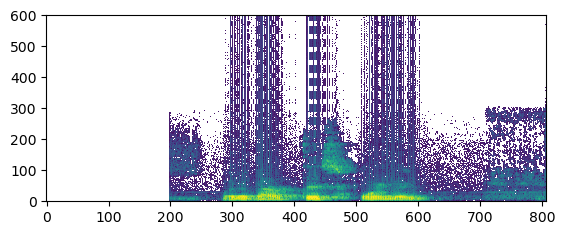

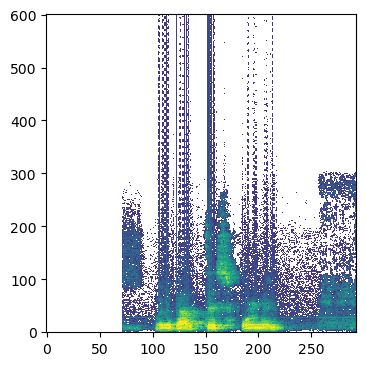

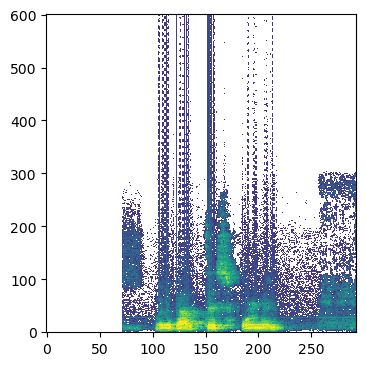

In [25]:
#Plot each spectrogram
for f in features.values():
    ax = plt.matshow(f.T, origin='lower', aspect=0.5, norm=LogNorm(vmin=0, vmax=10))
    ax.axes.xaxis.set_ticks_position('bottom')